In [1]:
import pandas as pd

# Load the uploaded files
file_path_eda = "cleaned_data_eda.csv"
file_path_reviews = "reviews_rating_data.csv"

data_eda = pd.read_csv(file_path_eda)
data_reviews = pd.read_csv(file_path_reviews)

# Combine both dataframes for analysis
data_combined = pd.concat([data_eda, data_reviews], axis=0, ignore_index=True)

# Get initial information
data_combined_info = {
    "shape": data_combined.shape,
    "columns": data_combined.columns.tolist(),
    "head": data_combined.head(),
}

data_combined_info


{'shape': (21430, 8),
 'columns': ['nama_produk',
  'harga_produk',
  'penjual',
  'kota_toko',
  'banyak_terjual',
  'rating_produk',
  'Review',
  'Rating'],
 'head':                                          nama_produk  harga_produk  \
 0  sepatu casual sneakers santai terbaru pria tre...      180000.0   
 1  sepatu boots pria gaya baru model fashion tgf2...      275000.0   
 2  Kanky Klasik Story Kagayaku - Sepatu Sneakers ...      388800.0   
 3  Kanky Story Honjo - Sepatu Sneakers Casual Spo...      318800.0   
 4  Aerostreet X Gian 37-44 Putih Biru Tua Oranye ...      229900.0   
 
           penjual        kota_toko  banyak_terjual  rating_produk Review  \
 0  Good Father 40  Jakarta Selatan             5.0            5.0    NaN   
 1  Good Father 40  Jakarta Selatan             4.0            5.0    NaN   
 2    Sepatu Kanky     Kab. Bandung          2000.0            4.9    NaN   
 3    Sepatu Kanky     Kab. Bandung         10000.0            5.0    NaN   
 4      Aerostreet 

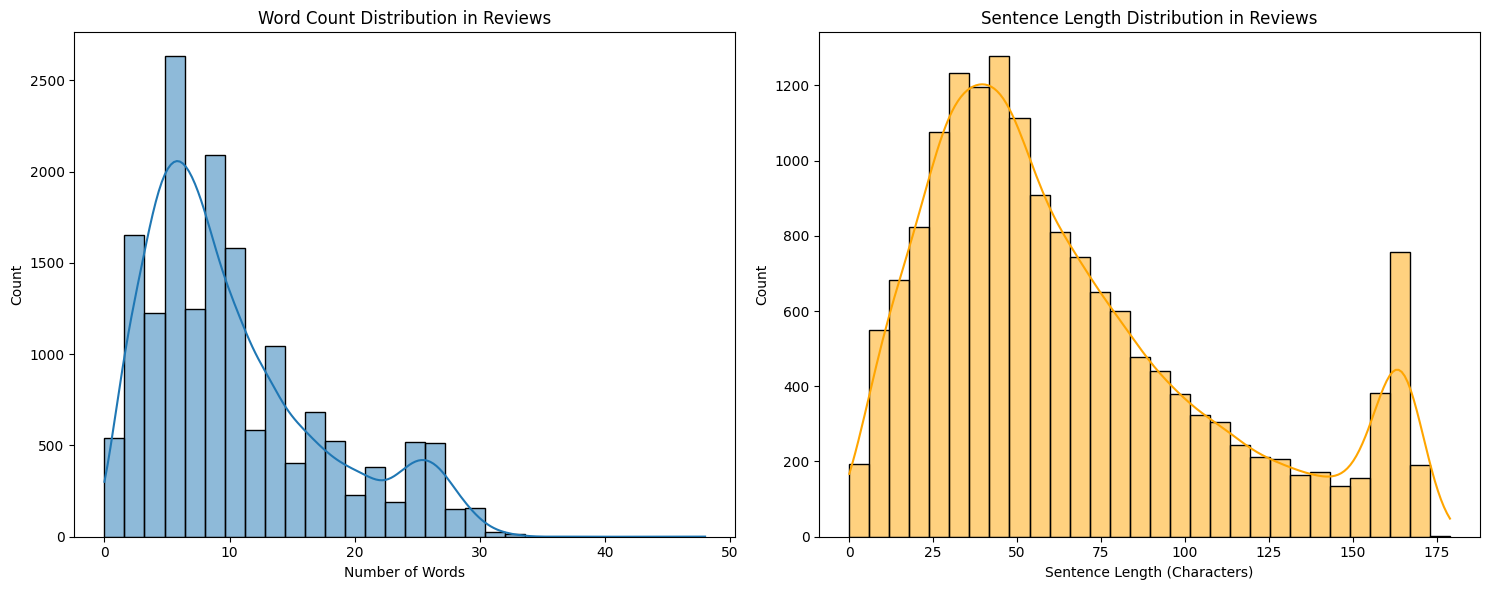

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Filter data where reviews exist
data_combined = data_combined.dropna(subset=['Review'])
data_combined = data_combined.drop_duplicates().reset_index(drop=True)

# Define a helper function to clean text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase
    return text

# Preprocess reviews
data_combined['Cleaned_Review'] = data_combined['Review'].apply(lambda x: clean_text(str(x)))
data_combined['Word_Count'] = data_combined['Cleaned_Review'].apply(lambda x: len(x.split()))
data_combined['Sentence_Length'] = data_combined['Cleaned_Review'].apply(lambda x: len(x))

# Step 1: Data Overview
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Word Count Distribution
sns.histplot(data_combined['Word_Count'], bins=30, kde=True, ax=ax[0])
ax[0].set_title("Word Count Distribution in Reviews")
ax[0].set_xlabel("Number of Words")
ax[0].set_ylabel("Count")

# Sentence Length Distribution
sns.histplot(data_combined['Sentence_Length'], bins=30, kde=True, ax=ax[1], color='orange')
ax[1].set_title("Sentence Length Distribution in Reviews")
ax[1].set_xlabel("Sentence Length (Characters)")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


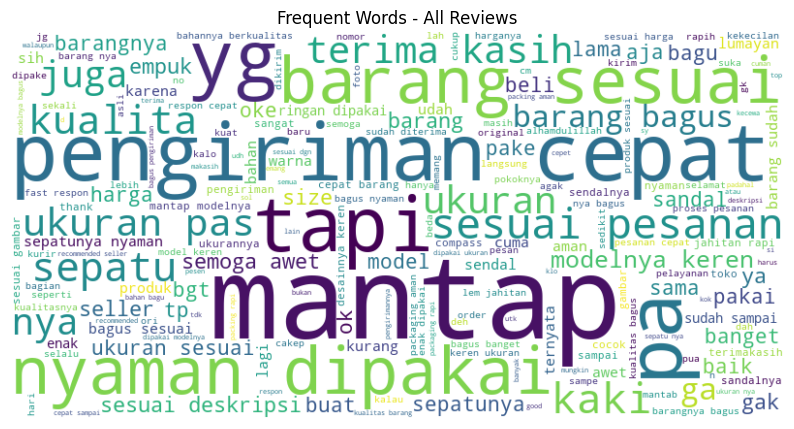

Top 10 Frequent Words:
sesuai: 4173
bagus: 3625
barang: 3249
nyaman: 2473
cepat: 2246
ukuran: 2245
nya: 2076
pas: 1940
pengiriman: 1866
yg: 1705


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

# Define a simple list of Indonesian stopwords manually for this case
manual_stopwords = [
    'yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'ini', 'itu', 'dengan', 'saya', 'kamu', 
    'dia', 'kita', 'mereka', 'ada', 'tidak', 'bisa', 'akan', 'pada', 'oleh', 'sebuah', 'jadi'
]


# Use existing reviews as the dataset does not have rating-based splits
all_reviews = data_combined['Cleaned_Review']

# Generate a word cloud for all reviews (assuming no positive/negative split)
combined_wordcloud = WordCloud(width=800, height=400, stopwords=manual_stopwords, background_color='white').generate(' '.join(all_reviews))

# Vectorize the reviews to find the top N frequent words
vectorizer = CountVectorizer(stop_words=manual_stopwords, max_features=10)
X = vectorizer.fit_transform(all_reviews)

# Get the word frequencies
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Plot Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(combined_wordcloud, interpolation='bilinear')
plt.title("Frequent Words - All Reviews")
plt.axis('off')
plt.show()

# Display Top N Frequent Words
print("Top 10 Frequent Words:")
for word, freq in sorted_word_freq:
    print(f"{word}: {freq}")


In [4]:
import os
import pandas as pd

def load_data():
    file_path_eda = "cleaned_data_eda.csv"
    file_path_reviews = "reviews_rating_data.csv"
    if os.path.exists(file_path_eda) and os.path.exists(file_path_reviews):
        data_eda = pd.read_csv(file_path_eda)
        data_reviews = pd.read_csv(file_path_reviews)
        data_combined = pd.concat([data_eda, data_reviews], axis=0, ignore_index=True)
        return data_combined
    else:
        print("Data files are missing. Please check file paths.")

data_combined = load_data()

In [5]:
import re

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [6]:
data_combined = data_combined.dropna(subset=['Review']).drop_duplicates().reset_index(drop=True)
data_combined['Cleaned_Review'] = data_combined['Review'].apply(lambda x: clean_text(str(x)))
data_combined['Word_Count'] = data_combined['Cleaned_Review'].apply(lambda x: len(x.split()))
data_combined['Sentence_Length'] = data_combined['Cleaned_Review'].apply(lambda x: len(x))


In [7]:
data_combined.head(10)

,nama_produk,harga_produk,penjual,kota_toko,banyak_terjual,rating_produk,Review,Rating,Cleaned_Review,Word_Count,Sentence_Length
0,NaN,NaN,NaN,NaN,NaN,NaN,"Produk Ok, pengiriman relatif cepat, dan respo...",bintang 5,produk ok pengiriman relatif cepat dan respon ...,9,58
1,NaN,NaN,NaN,NaN,NaN,NaN,"modelnya pas, keren, bahannya bagus, sdh bbrp ...",bintang 5,modelnya pas keren bahannya bagus sdh bbrp kal...,9,56
2,NaN,NaN,NaN,NaN,NaN,NaN,saya sangat puas banget pengen beli lagi asli,bintang 5,saya sangat puas banget pengen beli lagi asli,8,45
3,NaN,NaN,NaN,NaN,NaN,NaN,"Barang datang sesuai deskripsi,pembelian kedua...",bintang 5,barang datang sesuai deskripsipembelian kedua ...,20,163
4,NaN,NaN,NaN,NaN,NaN,NaN,"barang sesuai , kualitas bagus buatan Indonesi...",bintang 5,barang sesuai kualitas bagus buatan indonesia ...,12,79
5,NaN,NaN,NaN,NaN,NaN,NaN,"Respon admin cepat, kualitas bagus, bahan enak...",bintang 5,respon admin cepat kualitas bagus bahan enak e...,19,128
6,NaN,NaN,NaN,NaN,NaN,NaN,sandalnya oke dan nyaman dipakai jalan. bisa d...,bintang 5,sandalnya oke dan nyaman dipakai jalan bisa di...,13,82
7,NaN,NaN,NaN,NaN,NaN,NaN,product baik sekali dipakai injak pas klop. ti...,bintang 5,product baik sekali dipakai injak pas klop tid...,17,105
8,NaN,NaN,NaN,NaN,NaN,NaN,proses dan pengiriman lama sampainya. pengepak...,bintang 4,proses dan pengiriman lama sampainya pengepaka...,22,161
9,NaN,NaN,NaN,NaN,NaN,NaN,"barang sesuai dengan deskripsi, kualitas bagus...",bintang 5,barang sesuai dengan deskripsi kualitas bagus ...,10,72


In [8]:
import pandas as pd

# Contoh DataFrame
data = {
    'Rating': ['bintang 1', 'bintang 2', 'bintang 3', 'bintang 4', 'bintang 5'],
    'Cleaned_Review': ['Ulasan buruk', 'Tidak puas', 'Biasa saja', 'Bagus', 'Sangat baik']
}
data_combined = pd.DataFrame(data)

# Ekstrak angka dari kolom 'Rating' dan konversi ke integer
data_combined['Rating'] = data_combined['Rating'].str.extract('(\d+)').astype(int)

# Tampilkan DataFrame hasil
print(data_combined)


   Rating Cleaned_Review
0       1   Ulasan buruk
1       2     Tidak puas
2       3     Biasa saja
3       4          Bagus
4       5    Sangat baik


<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\MSI\AppData\Local\Temp\ipykernel_10004\3038029505.py:11: SyntaxWarning: invalid escape sequence '\d'
  data_combined['Rating'] = data_combined['Rating'].str.extract('(\d+)').astype(int)


Text(0.5, 1.0, 'WordCloud of Negative Reviews')

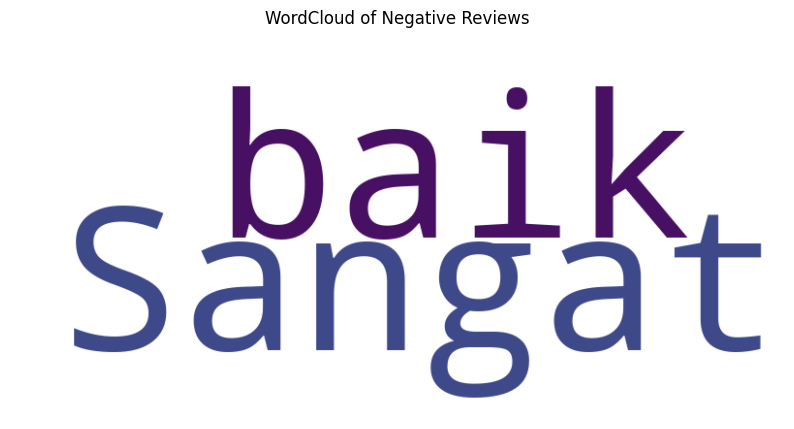

In [9]:
from wordcloud import WordCloud

low_rating_reviews = data_combined[
    (data_combined['Rating'].isin([5])) & 
    (data_combined['Cleaned_Review'].notna())
]['Cleaned_Review']

wordcloud_low = WordCloud(width=800, height=400, stopwords=manual_stopwords, background_color='white').generate(' '.join(low_rating_reviews))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Negative Reviews")

In [10]:
# Check for sentiment scores and ratings in the dataset
# Since 'rating_produk' contains NaN, I'll analyze class balance based on a threshold for 'banyak_terjual' as a placeholder for now

# Define a column for sentiment (simulated sentiment based on 'banyak_terjual')
data_combined['Sentiment'] = data_combined['banyak_terjual'].apply(lambda x: 'Positive' if x >= 50 else 'Negative' if pd.notna(x) else 'Unknown')

# Count sentiment classes
sentiment_counts = data_combined['Sentiment'].value_counts()

# Histogram for Sentiment Scores if they exist (placeholders)
if 'Rating' in data_combined.columns and data_combined['Rating'].notna().sum() > 0:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_combined['Rating'], bins=20, kde=True, color='blue')
    plt.title("Sentiment Scores Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.show()
else:
    "No sentiment score available to visualize."


KeyError: 'banyak_terjual'

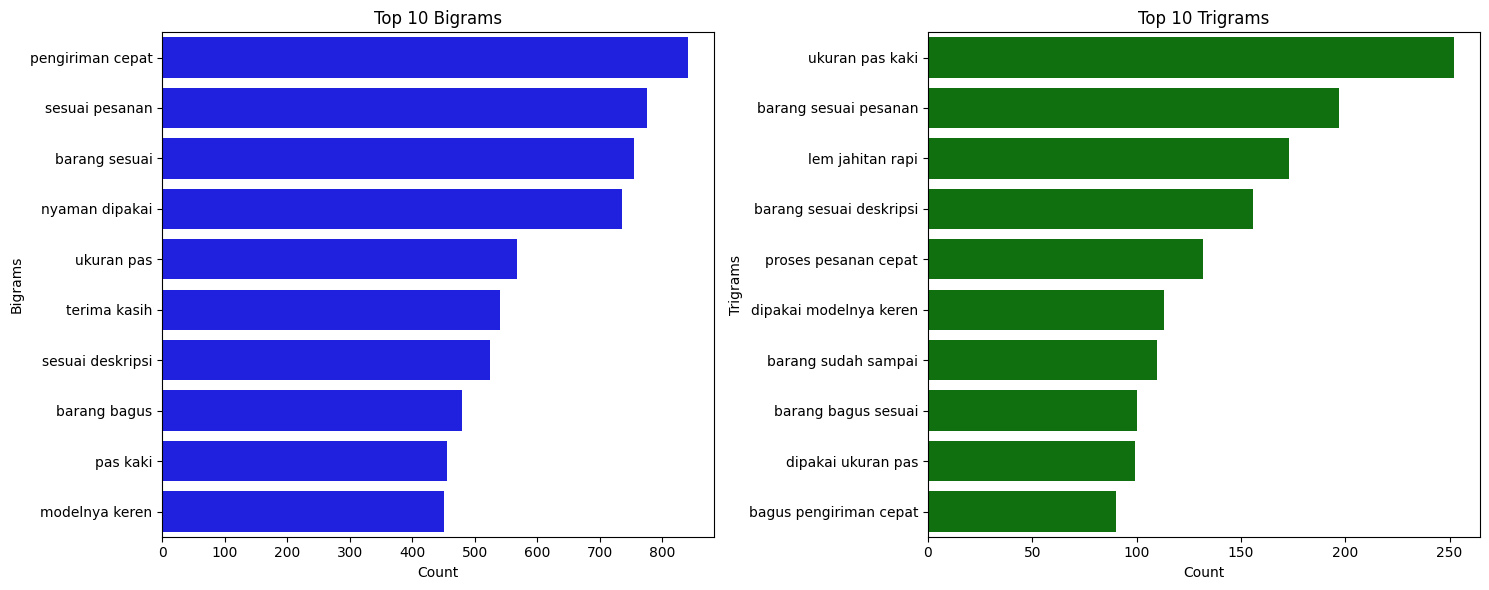

{'Top Positive TF-IDF Words': array(['bagus', 'barang', 'cepat', 'keren', 'nya', 'nyaman', 'pas',
        'pengiriman', 'sesuai', 'ukuran'], dtype=object),
 'Top Negative TF-IDF Words': array(['bagus', 'barang', 'cepat', 'nya', 'nyaman', 'pas', 'pengiriman',
        'sesuai', 'ukuran', 'yg'], dtype=object)}

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Step 1: N-Gram Analysis
def get_top_ngrams(corpus, n=2, top_n=10):
    """ Function to generate top n-grams from text corpus """
    vec = CountVectorizer(ngram_range=(n, n), stop_words=manual_stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    ngram_counts = bag_of_words.sum(axis=0)
    ngrams_freq = [(word, ngram_counts[0, idx]) for word, idx in vec.vocabulary_.items()]
    sorted_ngrams = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:top_n]
    return sorted_ngrams

# Get top bigrams and trigrams
top_bigrams = get_top_ngrams(all_reviews, n=2, top_n=10)
top_trigrams = get_top_ngrams(all_reviews, n=3, top_n=10)

# Plot bigrams and trigrams
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Bigrams
bigram_words, bigram_counts = zip(*top_bigrams)
sns.barplot(y=bigram_words, x=bigram_counts, ax=ax[0], color='blue')
ax[0].set_title("Top 10 Bigrams")
ax[0].set_xlabel("Count")
ax[0].set_ylabel("Bigrams")

# Trigrams
trigram_words, trigram_counts = zip(*top_trigrams)
sns.barplot(y=trigram_words, x=trigram_counts, ax=ax[1], color='green')
ax[1].set_title("Top 10 Trigrams")
ax[1].set_xlabel("Count")
ax[1].set_ylabel("Trigrams")

plt.tight_layout()
plt.show()

# Step 2: Unique Word Insights with TF-IDF
# Simulated positive and negative splits
positive_reviews = all_reviews.sample(frac=0.5, random_state=42)
negative_reviews = all_reviews.drop(positive_reviews.index)

# Step 2: Unique Word Insights using TF-IDF
if not positive_reviews.empty and not negative_reviews.empty:
    # TF-IDF for positive reviews
    tfidf_vectorizer_pos = TfidfVectorizer(stop_words=manual_stopwords, max_features=10)
    tfidf_positive = tfidf_vectorizer_pos.fit_transform(positive_reviews)
    positive_words = tfidf_vectorizer_pos.get_feature_names_out()

    # TF-IDF for negative reviews
    tfidf_vectorizer_neg = TfidfVectorizer(stop_words=manual_stopwords, max_features=10)
    tfidf_negative = tfidf_vectorizer_neg.fit_transform(negative_reviews)
    negative_words = tfidf_vectorizer_neg.get_feature_names_out()

    # Display Results
    tfidf_results = {
        "Top Positive TF-IDF Words": positive_words,
        "Top Negative TF-IDF Words": negative_words
    }
else:
    tfidf_results = {"Error": "Insufficient reviews for positive or negative sentiment"}

tfidf_results

